In [1]:
import numpy as np
import time
from foapgb_kimura import core
from foapgb_kimura import lattice
from foapgb_kimura import plot

from scipy.spatial import distance

In [2]:
# Number of columns
Num_Cols = 20

# 格子は0-10に存在する
Spartial_Scaling = 10 / (Num_Cols)

city_network = lattice.make_lattice(Num_Cols)
K = Num_Cols * Num_Cols

# 通勤費用パラメータ
t = 0.1

# 距離抵抗パラメータ
tau = 0.5

# 労働投入量
L = 1.0

# 総土地供給量は100*100=100とする
Total_S = 100
S_bar = Total_S / K

Coordinate_Data = \
np.array([(city_network['node_dic'][str(i)]['x_pos']*Spartial_Scaling, 
           city_network['node_dic'][str(i)]['y_pos']*Spartial_Scaling) for i in range(K)])
distance_matrix = distance.squareform(distance.pdist(Coordinate_Data))

# theta -> infty = deterministic model 
theta_N = 1.0
theta_M = 1.0

print('theta_N=', theta_N)
print('theta_M=', theta_M)

print('t=', t)
print('tau=', tau)

theta_N= 1.0
theta_M= 1.0
t= 0.1
tau= 0.5


In [3]:
prm = core.Parameter(K, distance_matrix, t, tau, L, Total_S, theta_M, theta_N)
sub = core.Sub(prm)

master = core.Master(prm, sub, itr_max_sub=100, err_sub=10**(-3))

print('M=', prm.M)
print('N=', prm.N)

M= 50.0
N= 50.0


In [4]:
# 初期解を均等分布で与える場合
m0 = prm.M*(np.ones(K)/K)

# 初期解をランダムに与える場合
# m0 = master.make_random_m()

In [5]:
start_time = time.process_time()
m_hist, F_hist, R, W, n_list, max_value = master.solve(m0=m0, err_mas=10**(-4), max_itr=50, Lip=1500)
end_time = time.process_time()
print("CPU_time:", end_time - start_time, "秒")
n_matrix = np.array([n_list[i:i+K] for i in range(0, len(n_list), K)])

W: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [6]:
np.max(R * (S_bar - np.sum(n_matrix, axis=1) - m_hist[max_value]))

8.840068710105243e-06

In [7]:
np.max(np.sum(n_matrix, axis=0) - L * m_hist[max_value])

1.0646482652296174e-05

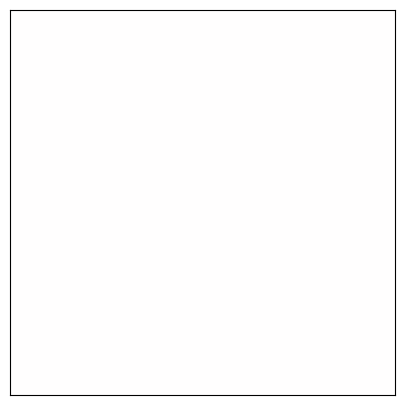

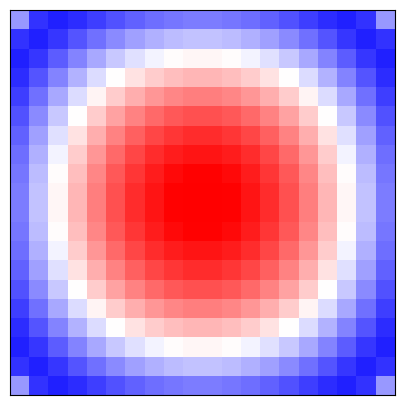

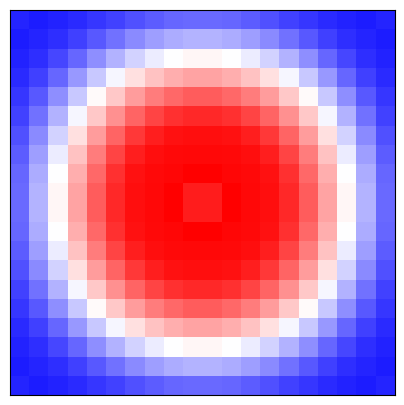

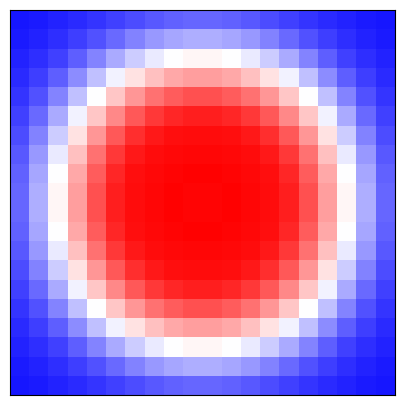

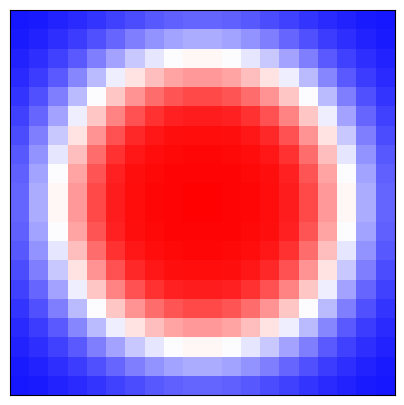

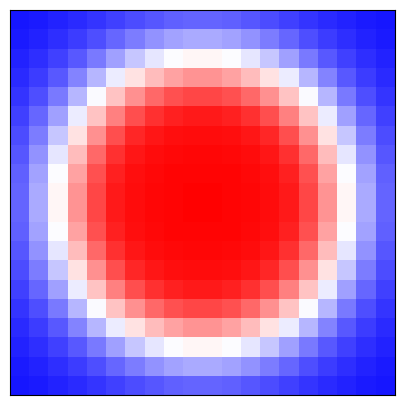

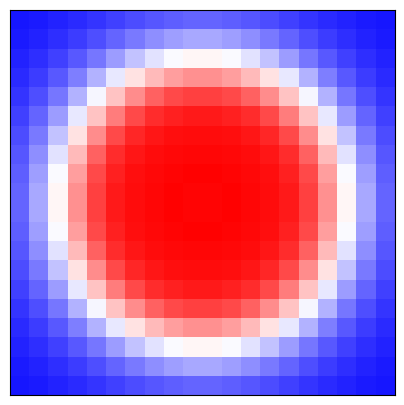

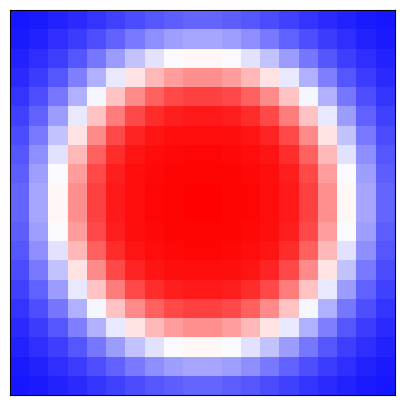

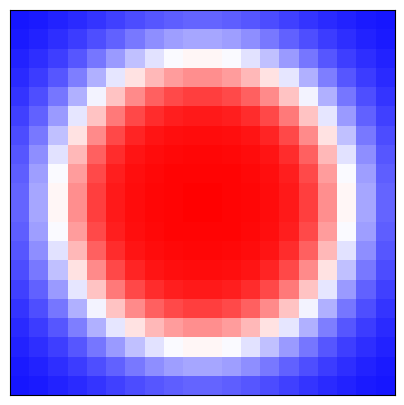

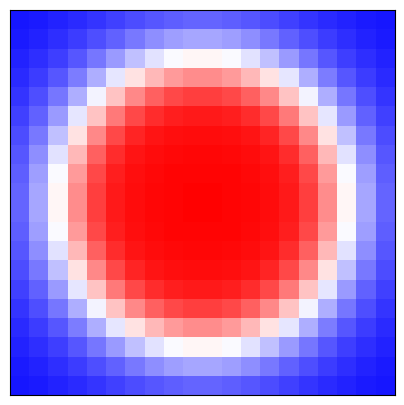

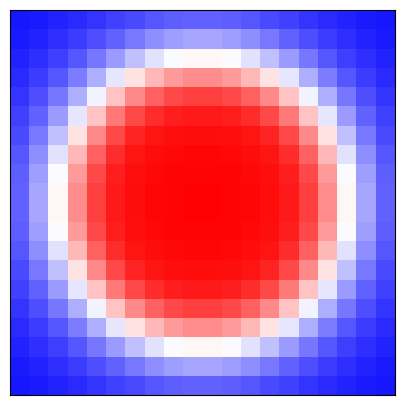

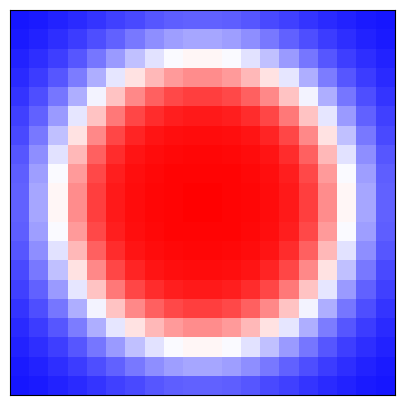

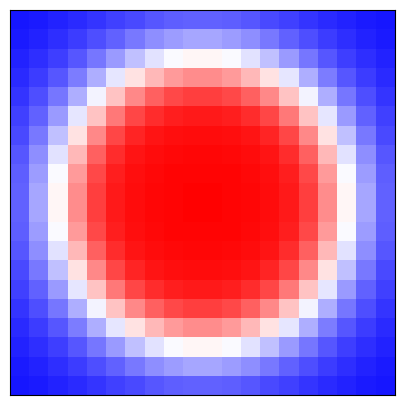

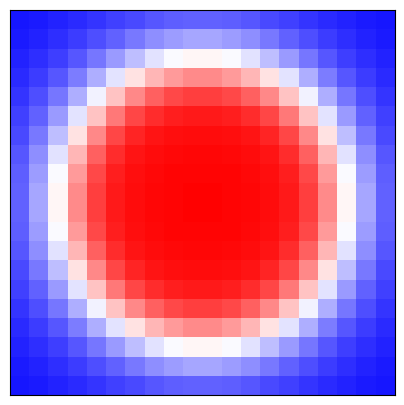

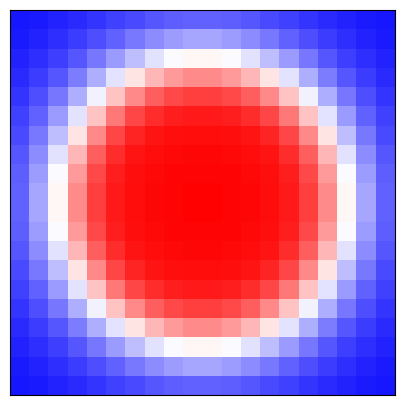

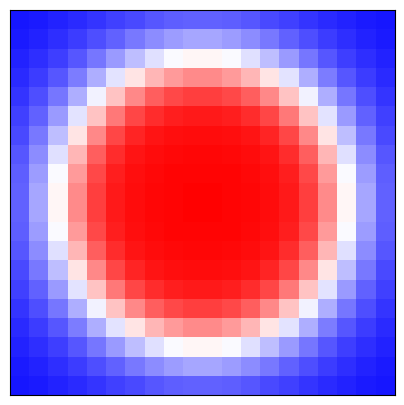

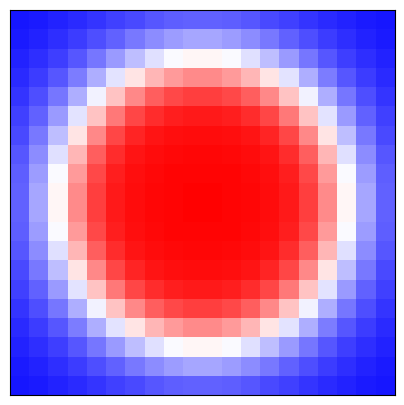

In [8]:
for k, v in m_hist.items():
    if k%3 == 0:
        plot.m_image(prm, v)